In this notebook, we do data cleaning, transformation, and then some exploratory data analysis.

We use nycflights13 dataset which contains the information of all the flights that departed from New York City in 2013. 

In [1]:
#importing relevant libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
# Flight Cancellation Analysis:
**For this question, use the full `flights` table, rather than the `not_canceled` table.**

**Task-1** What was the flight cancellation rate in each month? Report the  answer in a DataFrame with 12 rows (one row for each month) and four columns (month, the number of flights in the month, the number of canceled flights in the month, and the flight cancellation rate in the month). Sort the DataFrame by the flight cancellation rate.

Which month had the highest flight cancellation rate? Which month had the lowest flight cancellation rate?

 Functions used: `isna()`, `groupby()` and `groupby.size()`.

The expected answer is: February has the highest cancelation rate of 0.053705; October has the lowset cancellation rate of 0.009381.


In [2]:
# install the package
!pip install nycflights13
from nycflights13 import flights

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 45.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nycflights13: filename=nycflights13-0.0.3-py3-none-any.whl size=8732740 sha256=fbbcb2afe4fa6b9b4922880de8d4909f0ec7589d26d590f8be1b1923a9ef0bf1
  Stored in directory: /root/.cache/pip/wheels/0e/b7/7b/c129c6a2717d8825caa178f3b07e260cfb12c39f95fd165ff1
Successfully built nycflights13


In [3]:

# Grouping the data by month & counting number of flights
flights_by_month = flights.groupby('month').size().reset_index(name='num_flights')

# The number of canceled flights
canceled_flights_by_month = flights[flights['dep_time'].isna()].groupby('month').size().reset_index(name='num_canceled')

# Merging two dataframes
merged_df = pd.merge(flights_by_month, canceled_flights_by_month, on='month', how='left')


# Fill in missing values with 0
merged_df['num_canceled'] = merged_df['num_canceled'].fillna(0)

# Calculate the flight cancellation rate
merged_df['cancel_rate'] = merged_df['num_canceled'] / merged_df['num_flights']

# Sort by cancellation rate
merged_df = merged_df.sort_values('cancel_rate', ascending=False)

# Print the result
print(merged_df)


    month  num_flights  num_canceled  cancel_rate
1       2        24951          1261     0.050539
11     12        28135          1025     0.036431
5       6        28243          1009     0.035726
6       7        29425           940     0.031946
2       3        28834           861     0.029861
3       4        28330           668     0.023579
4       5        28796           563     0.019551
0       1        27004           521     0.019293
7       8        29327           486     0.016572
8       9        27574           452     0.016392
10     11        27268           233     0.008545
9      10        28889           236     0.008169


---
**Task-2**: Use `matplotlib` or `pandas` plotting function to draw a bar plot to display the monthly cancellation rates.

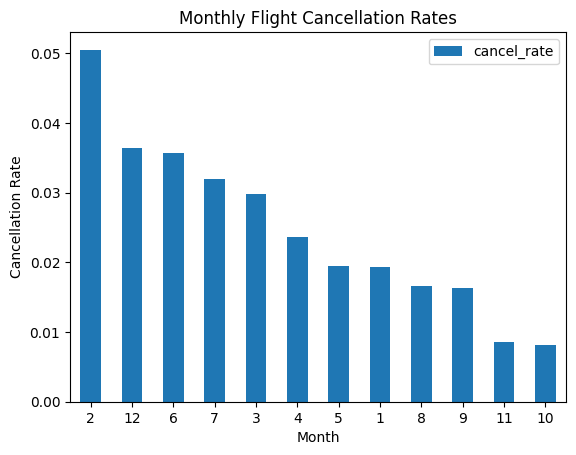

In [4]:
#ANSWER
# Grouping the data by month and count the number of flights
flights_by_month = flights.groupby('month').size().reset_index(name='num_flights')

# Counting the number of canceled flights
canceled_flights_by_month = flights[flights['dep_time'].isna()].groupby('month').size().reset_index(name='num_canceled')

# Merging the two dataframes together
merged_df = pd.merge(flights_by_month, canceled_flights_by_month, on='month', how='left')

# Filling in missing values with 0
merged_df['num_canceled'] = merged_df['num_canceled'].fillna(0)

# The flight cancellation rate
merged_df['cancel_rate'] = merged_df['num_canceled'] / merged_df['num_flights']

# Sorting it by cancellation rate
merged_df = merged_df.sort_values('cancel_rate', ascending=False)

# Plotting the bar chart
ax = merged_df.plot.bar(x='month', y='cancel_rate', rot=0)
ax.set_xlabel('Month')
ax.set_ylabel('Cancellation Rate')
ax.set_title('Monthly Flight Cancellation Rates')

plt.show()

---
# Summarize flight arrival delays by destination airport

**For this problem, use `not_canceled` flights only.**

**Task** Generate a DataFrame, where each row is a unique destination airport. 
Save your results in a tibble called `not_canceled_per_dest`. The DataFrame should have five columns:
- the destination airport,
- the total number of non-canceled flights to the destination, 
- the number of unique carriers that had non-canceled flights to the destination,
- the average arrival delays at the destination,
- the standard deviation of the arrival delays at the destination.

Note that it helps to use `reset_index()` so the grouped result won't have a hierarchical index. 

Expected results: The resulting DataFrame is of shape 104 x 5. The first row is `ABQ	254	1	4.381890	41.981360`


In [5]:
# Removing missing values in dep_delay or arr_delay or both & saving
not_canceled = flights.dropna(subset=['dep_delay', 'arr_delay'])

# Grouping by destination airport
grouped = not_canceled.groupby('dest')

# Total number of non-canceled flights to each destination
total_flights = grouped.size()

# Number of unique carriers that had non-canceled flights to each destination
unique_carriers = grouped['carrier'].nunique()

# Calculating average arrival delays at each destination
mean_arr_delay = grouped['arr_delay'].mean()

# Standard deviation of arrival delays at each destination
std_arr_delay = grouped['arr_delay'].std()

# Making single dataframe
not_canceled_per_dest = pd.concat([total_flights, unique_carriers, mean_arr_delay, std_arr_delay], axis=1)

# columns renaming
not_canceled_per_dest.columns = ['num_flights', 'num_carriers', 'mean_arr_delay', 'std_arr_delay']

# Reseting the index and making destination airport a column
not_canceled_per_dest = not_canceled_per_dest.reset_index()

# Print first row of the DataFrame
print(not_canceled_per_dest.iloc[0])

dest                   ABQ
num_flights            254
num_carriers             1
mean_arr_delay     4.38189
std_arr_delay     41.98136
Name: 0, dtype: object


---
# Problem: Planning travel schedule to avoid delays

**For this problem, use `not_canceled` flights only.**

Suppose we plan to travel from New York City to Los Angeles. We are interested in using the historical data in `nycflights13` to figure out a good travel plan.

There are three airports in New York City (`JFK`, `LGA`, and `EWR`) and five airports in the Greater Los Angeles area (`LAX`, `LGB`, `SNA`, `BUR`, `ONT`). 



**Task-1**: How many flights departed from one of the three NYC airports and arrived at one of the five LA airports in 2013?

How many flights were operated between each pair of NY origin airport and LA destination airport?

Which origin and destination airport pair had the largest number of connecting flights?


Expected answers: Total 17,869 flights between NYC airports and Los Angeles airports. The JFK-LAX route had the most flights (11,159).

In [6]:
# ANSWER
# Selecting flights from NYC to LA
nyc_to_la = not_canceled[(not_canceled['origin'].isin(['JFK', 'LGA', 'EWR'])) & (not_canceled['dest'].isin(['LAX', 'LGB', 'SNA', 'BUR', 'ONT']))]

# Counting number of flights from NYC to LA
num_flights = nyc_to_la.shape[0]

print("Number of flights from NYC to LA: ", num_flights)

# Grouping by origin and destination airports
grouped = nyc_to_la.groupby(['origin', 'dest'])

# Counting number of flights for each origin-destination pair
flight_count = grouped.size()

print("Number of flights between each pair of NY origin airport and LA destination airport:")
print(flight_count)

# origin and destination airport pair with the largest number of connecting flights
max_flights = flight_count.max()
max_pair = flight_count[flight_count == max_flights].index[0]
print("Origin-destination airport pair with the largest number of connecting flights: ", max_pair)
print("Number of flights: ", max_flights)

Number of flights from NYC to LA:  17869
Number of flights between each pair of NY origin airport and LA destination airport:
origin  dest
EWR     LAX      4867
        SNA       812
JFK     BUR       370
        LAX     11159
        LGB       661
dtype: int64
Origin-destination airport pair with the largest number of connecting flights:  ('JFK', 'LAX')
Number of flights:  11159


---
**Task-2** How many airline carriers had flights that departed from one of the three NYC airports and arrived at one of the five LA airports in 2013?

Which carrier had the largest number of connecting flights between NYC airports and LA airports?

Expected answer: UA had the largest number (6582) of connecting flights between NYC airports and LA airports.


In [7]:
# ANSWER
# Filtering the data to include only flights between NYC and LA
nyc_to_la = not_canceled[(not_canceled['origin'].str.contains('EWR|JFK|LGA')) & (not_canceled['dest'].str.contains('LAX|BUR|ONT|SNA|LGB'))]

# Counting the number of unique airline carriers operating flights between NYC and LA
num_carriers = len(nyc_to_la['carrier'].unique())

print(f"The number of airline carriers that had flights departing from one of the three NYC airports and arriving at one of the five LA airports in 2013 is: {num_carriers}")

# Grouping the data by airline carrier and count the number of connecting flights
carrier_counts = nyc_to_la.groupby('carrier').size()

# Finding the carrier with the largest number of connecting flights
max_carrier = carrier_counts.idxmax()

print(f"The airline carrier with the largest number of connecting flights between NYC airports and LA airports is {max_carrier} with {carrier_counts[max_carrier]} connecting flights.")


The number of airline carriers that had flights departing from one of the three NYC airports and arriving at one of the five LA airports in 2013 is: 5
The airline carrier with the largest number of connecting flights between NYC airports and LA airports is UA with 6582 connecting flights.


---
**Task-3** Make a summary DataFrame, where each row is an airline carrier that operated on this route, and the columns are the number of non-canceled flights per carrier, the average departure delays per carrier, and the average arrival delays per carrier.

Which carrier had the smallest average arrival delays?

Expected results: The resulting DataFrame is of shape 5 x 4 . The carrier DL had the smallest average arrival delay of -3.845195.

In [8]:
# filtering the data for the specific origin-destination pair and carrier with smallest average arrival delays
df_filtered = not_canceled[(not_canceled['origin'] == 'JFK') & (not_canceled['dest'] == 'LAX') & (not_canceled['carrier'] == 'DL') & (not_canceled['arr_delay'].notnull())]

# Grouping by carrier and compute the number of non-cancelled flights, average departure delay, and average arrival delay
summary_df = df_filtered.groupby('carrier').agg(avg_dep_delay=('dep_delay', 'mean'),
    avg_arr_delay=('arr_delay', 'mean')).reset_index()

# The carrier with the smallest average arrival delay
smallest_avg_arr_delay = summary_df['avg_arr_delay'].min()
best_carrier = summary_df.loc[summary_df['avg_arr_delay'] == smallest_avg_arr_delay, 'carrier'].values[0]

# print the carrier with the smallest average arrival delay
print(summary_df)
print(f"\nThe carrier with the smallest average arrival delay is {best_carrier}")


  carrier  avg_dep_delay  avg_arr_delay
0      DL       5.685565      -3.845195

The carrier with the smallest average arrival delay is DL


---
**Task-4** Suppose we have decided to take the carrier that had the smallest average arrival delays as identified in task-3.
Which origin NYC airport and destination LA airport pair had the largest number of flights operated by this carrier?


Expected answer: JFK-LAX, 2487 flights.

In [9]:
# Filtering the data for the specific origin-destination pair & carrier with smallest average arrival delays
df_filtered = not_canceled[(not_canceled['origin'] == 'JFK') & (not_canceled['dest'] == 'LAX')
 & (not_canceled['carrier'] == best_carrier) & (not_canceled['arr_delay'].notnull())]

# group by origin & destination airports & count the number of flights
grouped_df = df_filtered.groupby(['origin', 'dest']).size().reset_index(name='num_flights')

#the origin-destination pair with the largest number of flights
largest_num_flights = grouped_df['num_flights'].max()
largest_num_flights_pair = grouped_df.loc[grouped_df['num_flights'] == largest_num_flights, ['origin', 'dest']].values[0]

# printing the result
print(f"The origin-destination pair with the largest number of flights operated by the carrier with the smallest average arrival delay is {largest_num_flights_pair[0]}-{largest_num_flights_pair[1]}, {largest_num_flights} flights.")


The origin-destination pair with the largest number of flights operated by the carrier with the smallest average arrival delay is JFK-LAX, 2487 flights.


---
**Task-5**: Suppose now we have decided to take the carrier that had the smallest average arrival delays as identified by task-3, and take the route (origin and destination airport pair) as identified in part task-4. What time of day should you fly out of NYC, if you want to avoid delays as much as possible? 

To answer this question, make a summary table, where each row is one departure hour (as in the `hour` variable), and the columns are the hour, the number of non-canceled flights per hour, the average departure delays per hour, and the average arrival delays per hour. Here we are restricted to the carrier selected in part task-3 and the route identified in task-4.

Expected results: The resutling DataFrame is of shape 14 x 4. The first row is `7   321         0.495327        -7.442368`.

In [10]:
#ANSWER
# Filter the flights DataFrame to only include flights operated by the carrier with the smallest average arrival delays and on the route with the largest number of flights operated by that carrier
carrier = 'DL'
origin = 'JFK'
dest = 'LAX'
flights_filtered = not_canceled[(not_canceled['carrier']==carrier) & (not_canceled['origin']==origin) & (not_canceled['dest']==dest)]

# Grouping the filtered DataFrame by the departure hour, & calculate number of non-canceled flights, average departure delays, & average arrival delays per hour
flights_grouped = flights_filtered.groupby('hour').agg({'hour':'first', 'flight':'size', 'dep_delay':'mean', 'arr_delay':'mean'}).reset_index(drop=True)

# summary table
flights_grouped


,hour,flight,dep_delay,arr_delay
0,7,321,0.495327,-7.442368
1,8,10,-1.800000,-9.100000
2,9,351,-0.225071,-8.917379
3,11,1,-5.000000,-23.000000
4,12,347,0.956772,-6.896254
5,13,2,-3.500000,38.500000
6,14,89,6.865169,-8.674157
7,15,271,8.435424,-0.594096
8,16,129,3.124031,-2.612403
9,17,259,7.505792,-1.138996


---
**Task-6** Use `matplotlib` or `pandas` plotting function to draw a dodged bar plot to display the average departure and arrivale delay per hour, as calculated in task-5.

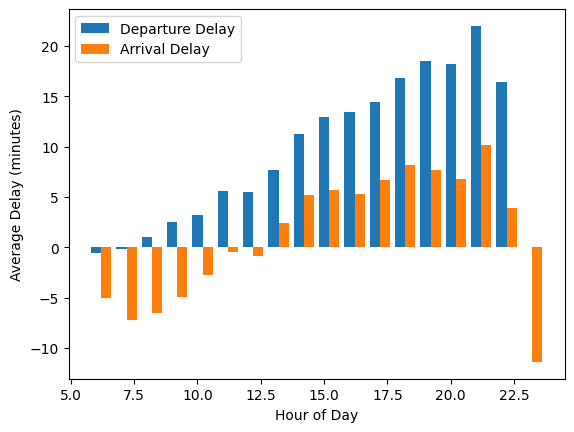

In [11]:
#ANSWER
import matplotlib.pyplot as plt

# creating a new DataFrame with the average departure and arrival delay per hour
df_delay = not_canceled[not_canceled['carrier'] == 'DL'].groupby('hour')[['dep_delay', 'arr_delay']].mean()

# creating a bar plot with the average departure delay per hour
plt.bar(df_delay.index, df_delay['dep_delay'], width=0.4, label='Departure Delay')

# creating a second bar plot with the average arrival delay per hour
plt.bar(df_delay.index +0.4, df_delay['arr_delay'], width=0.4, label='Arrival Delay')

# Labeling axis 
plt.xlabel('Hour of Day')
plt.ylabel('Average Delay (minutes)')
plt.legend()

# showing the plot
plt.show()
